In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datos = pd.read_excel("C:/Modelo_ML/SVM - NN - RF/Base.xlsx")

In [3]:
datos.shape

(160446, 7)

In [4]:
datos.head(5)

,Dia,Arma_empleada,Metodo_agresor,Metodo_victima,Sexo,Estado_Civil,Escolaridad
0,1,2,4,1,2,4,3
1,1,12,1,1,2,4,5
2,1,12,1,1,1,4,2
3,1,12,1,1,2,4,5
4,1,12,1,1,1,4,5


In [5]:
predictors = datos.drop('Dia', axis=1)
target = datos['Dia']

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.20)

In [7]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [8]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))

[[  89  522  139  263   41  410 1462]
 [  75 1059  271  527   98  597 2745]
 [  91  941  221  477   92  488 2127]
 [  66 1039  263  532   91  511 2503]
 [  54  790  187  420   90  427 1883]
 [ 100  841  211  434  101  676 2321]
 [ 107 1134  295  545  117  633 2984]]


In [9]:
print(classification_report(y_test,y_pred)) 

             precision    recall  f1-score   support

          1       0.15      0.03      0.05      2926
          2       0.17      0.20      0.18      5372
          3       0.14      0.05      0.07      4437
          4       0.17      0.11      0.13      5005
          5       0.14      0.02      0.04      3851
          6       0.18      0.14      0.16      4684
          7       0.19      0.51      0.27      5815

avg / total       0.16      0.18      0.14     32090



In [10]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [11]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)
roc_auc = auc(fpr, tpr)

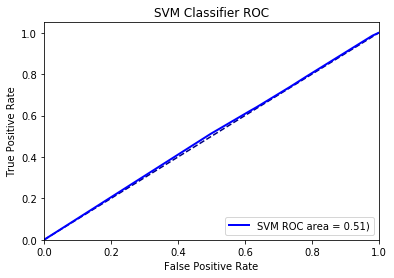

In [12]:
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('SVM Classifier ROC')
plt.plot(fpr, tpr, color='blue', lw=2, label='SVM ROC area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()

In [13]:
from sklearn.metrics import fbeta_score
fbeta_score(y_test, y_pred, average='macro', beta=0.5)

0.1378936581051065

In [14]:
fbeta_score(y_test, y_pred, average='micro', beta=0.5)

0.17609847304456216

In [15]:
fbeta_score(y_test, y_pred, average='weighted', beta=0.5)

0.1463479863771385

In [16]:
fbeta_score(y_test, y_pred, average=None, beta=0.5)

array([0.08469737, 0.17261051, 0.10245712, 0.14946339, 0.07063255,
       0.17199267, 0.21340199])